In [9]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Fit-a-polynomial-of-degree-m-to-your-training-data,-letting-$m-=-1,-2,-...$.-A-polynomial-of-degree-$m$-has-the-form-$$-p(x,-\textbf{w})-=-w_0-+-w_1x-+-w_2x^2-+-...-+-w_mx^m-$$Fit-by-minimizing-the-mean-squared-error-$E(W)$-via-differentiating-with-respect-to-$\textbf{w}$-and-solving-the-resulting-linear-equation;-this-will-give-the-optimal-weight-vector,-$w^*-$,-with-minimal-error-$-E(w^*)$." data-toc-modified-id="Fit-a-polynomial-of-degree-m-to-your-training-data,-letting-$m-=-1,-2,-...$.-A-polynomial-of-degree-$m$-has-the-form-$$-p(x,-\textbf{w})-=-w_0-+-w_1x-+-w_2x^2-+-...-+-w_mx^m-$$Fit-by-minimizing-the-mean-squared-error-$E(W)$-via-differentiating-with-respect-to-$\textbf{w}$-and-solving-the-resulting-linear-equation;-this-will-give-the-optimal-weight-vector,-$w^*-$,-with-minimal-error-$-E(w^*)$.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fit a polynomial of degree m to your training data, letting $m = 1, 2, ...$. A polynomial of degree $m$ has the form<br><br> <script type="math/tex; mode=display" id="MathJax-Element-126"> p(x, \textbf{w}) = w_0 + w_1x + w_2x^2 + ... + w_mx^m </script><br>Fit by minimizing the mean squared error $E(W)$ via differentiating with respect to $\textbf{w}$ and solving the resulting linear equation; this will give the optimal weight vector, $w^* $, with minimal error $ E(w^*)$.</a></span></li></ul></div>

# Fit a polynomial of degree m to your training data, letting $m = 1, 2, ...$. A polynomial of degree $m$ has the form<br><br> $$ p(x, \textbf{w}) = w_0 + w_1x + w_2x^2 + ... + w_mx^m $$<br>Fit by minimizing the mean squared error $E(W)$ via differentiating with respect to $\textbf{w}$ and solving the resulting linear equation; this will give the optimal weight vector, $w^* $, with minimal error $ E(w^*)$.


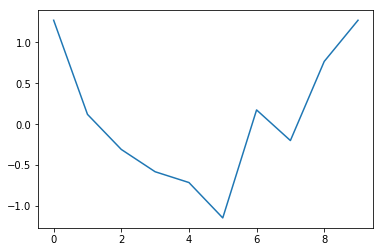

array([ 1.26960286,  0.1198294 , -0.30859164, -0.58096364, -0.71284313,
       -1.14503851,  0.17410827, -0.19988104,  0.76625646,  1.26966971])

In [65]:
mu, sigma = 0, .25
noise = np.random.normal(loc=mu, scale=sigma, size=10)
x_train = .6*np.linspace(1, 10, 10)
y_train = np.cos(x) + noise
plt.plot(y)
plt.show()
y

In [72]:
# Building matrix for left side of nonnormalized equation
# letting m = n  <------- ???
n = len(x_train)
m = n

left_matrix = []
right_matrix = []

extra = 0
for r in range(0, n): # Builds matrix
    left_row = []
    for m_i in range(0+extra, m+extra): # Builds a row 
        value = 0
        for x in x_train: # Gives single element of row 
            value += x ** m_i 
        left_row.append(value)
    
    # for i in range(m):
    #     value =  x ** i * len(x_train) *
    
    left_matrix.append(left_row)
    # right_matrix.append(left_row)
    extra += 1

left_matrix = np.matrix(left_matrix)
left_matrix

matrix([[  1.00000000e+01,   3.30000000e+01,   1.38600000e+02,
           6.53400000e+02,   3.28315680e+03,   1.71713520e+04,
           9.23044637e+04,   5.06136185e+05,   2.81724231e+06,
           1.58653671e+07],
        [  3.30000000e+01,   1.38600000e+02,   6.53400000e+02,
           3.28315680e+03,   1.71713520e+04,   9.23044637e+04,
           5.06136185e+05,   2.81724231e+06,   1.58653671e+07,
           9.01813224e+07],
        [  1.38600000e+02,   6.53400000e+02,   3.28315680e+03,
           1.71713520e+04,   9.23044637e+04,   5.06136185e+05,
           2.81724231e+06,   1.58653671e+07,   9.01813224e+07,
           5.16493560e+08],
        [  6.53400000e+02,   3.28315680e+03,   1.71713520e+04,
           9.23044637e+04,   5.06136185e+05,   2.81724231e+06,
           1.58653671e+07,   9.01813224e+07,   5.16493560e+08,
           2.97659428e+09],
        [  3.28315680e+03,   1.71713520e+04,   9.23044637e+04,
           5.06136185e+05,   2.81724231e+06,   1.58653671e+07,
      

In [ ]:
# Will solve the resulting linear equation with numpy.linalg.solve